In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

# Исходные данные

In [2]:
df = pd.read_csv('stud_math.xls')
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
262,GP,M,18,R,GT3,T,3.0,2.0,other,other,course,mother,1.0,3.0,0.0,no,no,no,yes,no,-9.0,yes,no,no,5.0,3.0,2.0,3.0,1.0,60.0
119,GP,M,15,U,GT3,T,3.0,4.0,other,other,reputation,father,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,3.0,4.0,3.0,4.0,6.0,65.0
192,GP,M,17,U,GT3,T,1.0,2.0,at_home,services,other,other,2.0,2.0,0.0,no,no,NaN,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,5.0,12.0,40.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
343,GP,F,17,U,GT3,A,2.0,2.0,at_home,at_home,home,father,1.0,2.0,1.0,no,yes,no,no,yes,-6.0,yes,yes,yes,3.0,3.0,1.0,4.0,0.0,0.0
62,GP,F,16,U,LE3,T,1.0,2.0,other,services,reputation,father,1.0,2.0,0.0,yes,no,no,yes,yes,-6.0,yes,yes,no,4.0,4.0,3.0,1.0,4.0,45.0
238,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,course,mother,3.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,no,no,2.0,1.0,1.0,3.0,2.0,55.0
323,GP,F,17,U,GT3,T,3.0,1.0,services,services,course,father,1.0,3.0,0.0,no,yes,no,no,no,-9.0,yes,yes,no,NaN,4.0,3.0,5.0,1.0,75.0


Описание датасета:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Очистка данных

In [4]:
# fill empty cells with None
df = df.applymap(lambda x: None if str(x).strip() == '' else x)
df = df.applymap(lambda x: None if str(x) == 'nan' else x)

In [5]:
def hist(series):
    # function to plot histogram with number of bars = number of values
    return series.hist(bins=series.nunique())

In [6]:
nom_list = []  # list of columns with nominative values
num_list = []  # list of columns with numeric values
ran_list = []  # list of columns with rank values

In [7]:
def empty(series):
    print('Пропусков в колонке', series.name, ':', series.isna().sum())


for col in df.columns:
    empty(df[col])

Пропусков в колонке school : 0
Пропусков в колонке sex : 0
Пропусков в колонке age : 0
Пропусков в колонке address : 17
Пропусков в колонке famsize : 27
Пропусков в колонке Pstatus : 45
Пропусков в колонке Medu : 3
Пропусков в колонке Fedu : 24
Пропусков в колонке Mjob : 19
Пропусков в колонке Fjob : 36
Пропусков в колонке reason : 17
Пропусков в колонке guardian : 31
Пропусков в колонке traveltime : 28
Пропусков в колонке studytime : 7
Пропусков в колонке failures : 22
Пропусков в колонке schoolsup : 9
Пропусков в колонке famsup : 39
Пропусков в колонке paid : 40
Пропусков в колонке activities : 14
Пропусков в колонке nursery : 16
Пропусков в колонке studytime, granular : 7
Пропусков в колонке higher : 20
Пропусков в колонке internet : 34
Пропусков в колонке romantic : 31
Пропусков в колонке famrel : 27
Пропусков в колонке freetime : 11
Пропусков в колонке goout : 8
Пропусков в колонке health : 15
Пропусков в колонке absences : 12
Пропусков в колонке score : 6


### 0 school  — аббревиатура школы, в которой учится ученик

In [8]:
df.school.describe()

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

In [9]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [10]:
nom_list.append('school')

В датасете представлены две школы. Учеников школы GP подавляющее большинство.  Пропусков нет.

### 1 sex — пол ученика ('F' - женский, 'M' - мужской)

In [11]:
df.sex.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

In [12]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [13]:
nom_list.append('sex')

Значения соответствуют заявленным, пропусков нет.

### 2 age — возраст ученика (от 15 до 22)

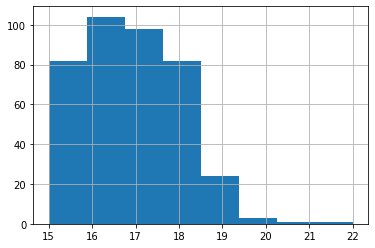

In [14]:
hist(df.age)

In [15]:
df.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [16]:
df.age.value_counts().sort_index()

15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

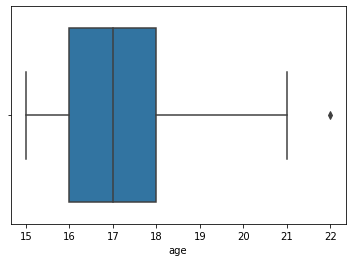

In [17]:
sns.boxplot(df.age)

In [18]:
df[df.age>=20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,None,GT3,T,4.0,2.0,health,other,course,None,2.0,3.0,2.0,no,yes,yes,no,no,-9.0,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,-3.0,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0


In [19]:
num_list.append('age')

Значения возраста от 15 до 22, пропусков нет. Формально есть выброс: один студент 22 лет. Крайне мало студентов 20, 21 года. Данные о них достаточно логичные, не вижу смысла их исключать.

### 3 address  — тип адреса ученика ('U' - городской, 'R' - за городом)

In [20]:
df.address.describe()

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

In [21]:
df.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [22]:
nom_list.append('address')

Есть пропуски. Значения соответствуют заявленным. Подавляющее большинство студентов живет в городе.

### 4 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [23]:
df.famsize.describe()

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

In [24]:
df.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [25]:
nom_list.append('famsize')

Есть пропуски. Значения соответствуют заявленным. Большинство учеников имеет большие семьи.

### 5 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [26]:
df.Pstatus.describe()

count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

In [27]:
df.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

In [28]:
nom_list.append('Pstatus')

Есть пропуски. Значения соответствуют заявленным.

### 6 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
df.Medu.describe()

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

In [30]:
df.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [31]:
df.Medu = df.Medu.astype('Int64')

In [32]:
df.Medu.value_counts()

4    131
2    102
3     97
1     59
0      3
Name: Medu, dtype: Int64

In [33]:
ran_list.append('Medu')

Есть 3 пропуска. Значения соответствуют заявленным. Значения преобразованы в целые числа.

### 7 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [34]:
df.Fedu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [35]:
df.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [36]:
df.Fedu[df.Fedu > 4] = None

<ipython-input-36-ea7e749a8ed0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fedu[df.Fedu > 4] = None


In [37]:
df.Fedu = df.Fedu.astype('Int64')

In [38]:
df.Fedu.value_counts()

2    106
3     96
4     88
1     78
0      2
Name: Fedu, dtype: Int64

In [39]:
ran_list.append('Fedu')

Есть пропуски. Значение, не соответствующее заявленному, исключено. Значения преобразованы в целые числа.

### 8 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [40]:
df.Mjob.describe()

count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

In [41]:
df.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [42]:
nom_list.append('Mjob')

Есть пропуски. Значения соответствуют заявленным.

### 9 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [43]:
df.Fjob.describe()

count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

In [44]:
df.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [45]:
nom_list.append('Fjob')

Есть пропуски. Значения соответствуют заявленным.

### 10 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [46]:
df.reason.describe()

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

In [47]:
df.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [48]:
nom_list.append('reason')

Есть пропуски. Значения соответствуют заявленным.

### 11 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [49]:
df.guardian.describe()

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

In [50]:
df.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [51]:
nom_list.append('guardian')

Есть пропуски. Значения соответствуют заявленным.

### 12 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [52]:
df.traveltime.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [53]:
df.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [54]:
df.traveltime = df.traveltime.astype('Int64')

In [55]:
df.traveltime.value_counts()

1    242
2     96
3     22
4      7
Name: traveltime, dtype: Int64

In [56]:
ran_list.append('traveltime')

Есть пропуски. Значения соответствуют заявленным. Значения преобразованы в целые числа.

### 13 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [57]:
df.studytime.describe()

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [58]:
df.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [59]:
df.studytime = df.studytime.astype('Int64')

In [60]:
df.studytime.value_counts()

2    194
1    103
3     64
4     27
Name: studytime, dtype: Int64

In [61]:
ran_list.append('studytime')

Есть пропуски. Значения соответствуют заявленным. Значения преобразованы в целые числа.

### 14 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

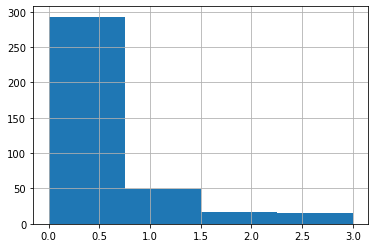

In [62]:
hist(df.failures)

In [63]:
df.failures.describe()

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [64]:
df.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [65]:
df.failures = df.failures.astype('Int64')

In [66]:
df.failures.value_counts()

0    293
1     49
2     16
3     15
Name: failures, dtype: Int64

In [67]:
num_list.append('failures')

Есть пропуски. Значения соответствуют заявленным. Значения преобразованы в целые числа.

### 15 schoolsup — дополнительная образовательная поддержка (yes или no)

In [68]:
df.schoolsup.describe()

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

In [69]:
df.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [70]:
nom_list.append('schoolsup')

Есть пропуски. Значения соответствуют заявленным.

### 16 famsup — семейная образовательная поддержка (yes или no)

In [71]:
df.famsup.describe()

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

In [72]:
df.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

In [73]:
nom_list.append('famsup')

Есть пропуски. Значения соответствуют заявленным.

### 17 paid — дополнительные платные занятия по математике (yes или no)

In [74]:
df.paid.describe()

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

In [75]:
df.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [76]:
nom_list.append('paid')

Есть пропуски. Значения соответствуют заявленным.

### 18 activities — дополнительные внеучебные занятия (yes или no)

Есть пропуски. Значения соответствуют заявленным.

In [77]:
df.activities.describe()

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

In [78]:
df.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [79]:
nom_list.append('activities')

Есть пропуски. Значения соответствуют заявленным.

### 19 nursery — посещал детский сад (yes или no)

In [80]:
df.nursery.describe()

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

In [81]:
df.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [82]:
nom_list.append('nursery')

Есть пропуски. Значения соответствуют заявленным.

### 20 studytime, granular - без описания

In [83]:
df['studytime, granular'].describe()

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

In [84]:
df['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

Есть пропуски. Значения отрицательные. Структура подозрительно похожа на колонку studytime

### 21 higher — хочет получить высшее образование (yes или no)

In [85]:
df.higher.describe()

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

In [86]:
df.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [87]:
nom_list.append('higher')

Есть пропуски. Значения соответствуют заявленным.

### 22 internet — наличие интернета дома (yes или no)

In [88]:
df.internet.describe()

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

In [89]:
df.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [90]:
nom_list.append('internet')

Есть пропуски. Значения соответствуют заявленным.

### 23 romantic — в романтических отношениях (yes или no)

In [91]:
df.romantic.describe()

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

In [92]:
df.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

In [93]:
nom_list.append('romantic')

Есть пропуски. Значения соответствуют заявленным.

### 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [94]:
df.famrel.describe()

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [95]:
df.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [96]:
df.famrel[df.famrel < 1] = None

<ipython-input-96-54d0ffc5ea5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.famrel[df.famrel < 1] = None


In [97]:
df.famrel = df.famrel.astype('Int64')

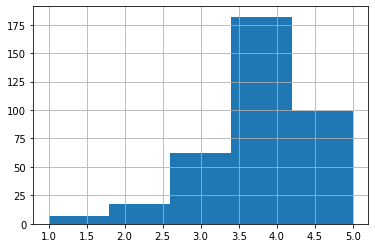

In [98]:
hist(df.famrel)

In [99]:
ran_list.append('famrel')

Есть пропуски. Значение, не соответствующее заявленным, исключено. Значения преобразованы в целые числа.

### 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

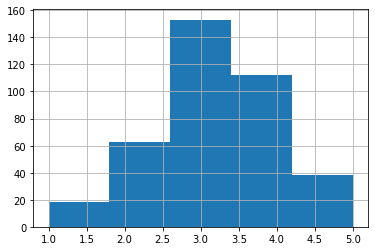

In [100]:
hist(df.freetime)

In [101]:
df.freetime.describe()

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [102]:
df.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [103]:
df.freetime = df.freetime.astype('Int64')

In [104]:
df.freetime.value_counts()

3    153
4    112
2     63
5     38
1     18
Name: freetime, dtype: Int64

In [105]:
ran_list.append('freetime')

Есть пропуски. Значения соответствуют заявленным. Значения преобразованы в целые числа.

### 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

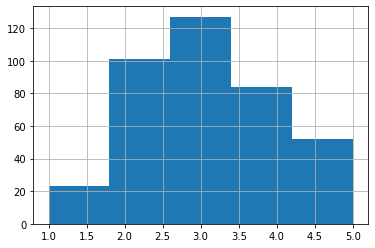

In [106]:
hist(df.goout)

In [107]:
df.goout.describe()

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [108]:
df.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [109]:
df.goout = df.goout.astype('Int64')
df.goout.value_counts()

3    127
2    101
4     84
5     52
1     23
Name: goout, dtype: Int64

In [110]:
ran_list.append('goout')

Есть пропуски. Значения соответствуют заявленным. Значения преобразованы в целые числа.

### 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

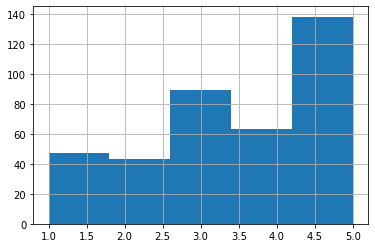

In [111]:
hist(df.health)

In [112]:
df.health.describe()

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [113]:
df.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [114]:
df.health = df.health.astype('Int64')
df.health.value_counts()

5    138
3     89
4     63
1     47
2     43
Name: health, dtype: Int64

In [115]:
ran_list.append('health')

Есть пропуски. Значения соответствуют заявленным. Значения преобразованы в целые числа.

### 28 absences — количество пропущенных занятий

In [116]:
df.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

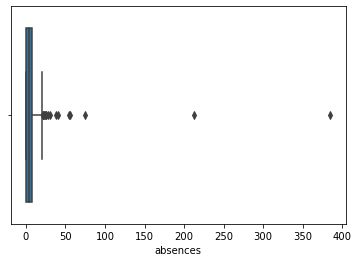

In [117]:
sns.boxplot(df.absences)

In [118]:
df.absences = df.absences.astype('Int64')

In [119]:
# absences_iqr = df.absences.quantile(0.75) - df.absences.quantile(0.25)
# df.absences = df.absences[df.absences.between(
#     df.absences.quantile(0.25)-1.5*absences_iqr,
#     df.absences.quantile(0.75)+1.5*absences_iqr)]
# df.absences.describe()

In [120]:
df.absences[df.absences > 200] = None

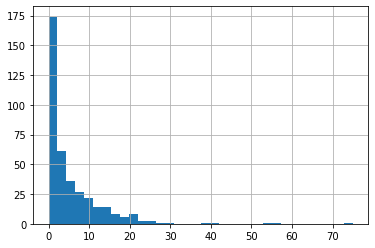

In [121]:
hist(df.absences)

In [122]:
num_list.append('absences')

Есть пропуски. В США количество учебных дней в году около 180. Значение количества пропусков свыше 200 исключены.

### 29 score — баллы по госэкзамену по математике

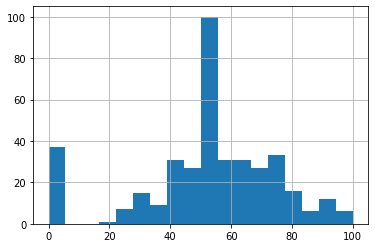

In [123]:
hist(df.score)

In [124]:
df.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

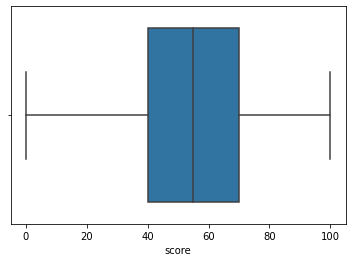

In [125]:
sns.boxplot(df.score)

In [126]:
df.drop(df[df.score.isna() == True].index, inplace=True)
df.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Есть пропуски. Выбросов не обнаружено. Строки с пустыми значениями исключены из набора.

# Корреляция числовых колонок

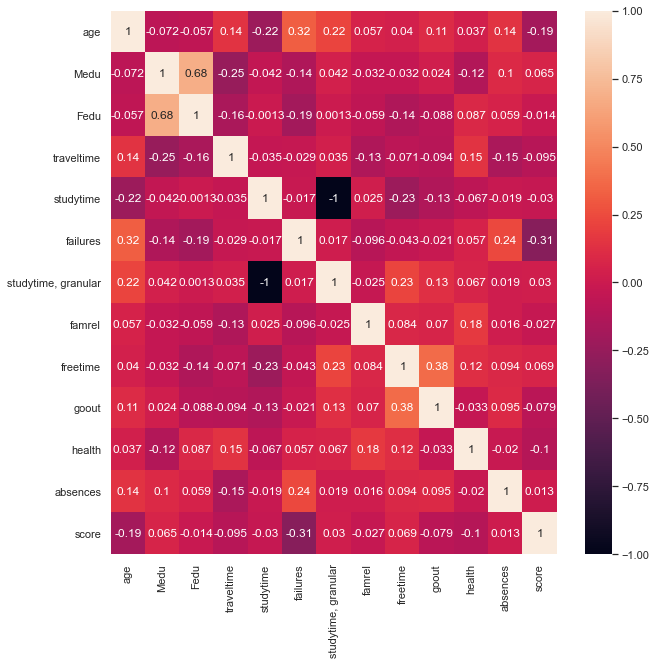

In [127]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(df.dropna().corr(), annot=True)

In [128]:
del df['studytime, granular']

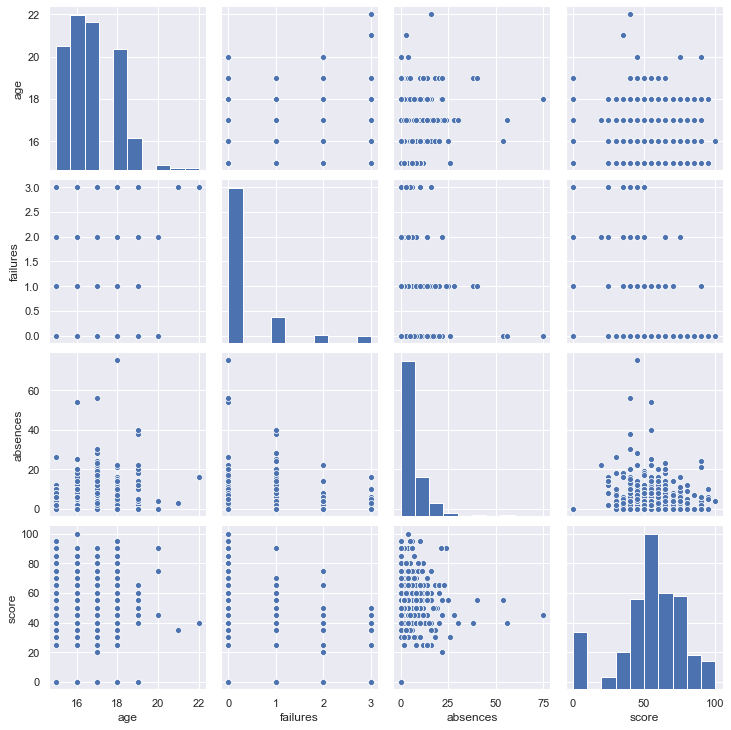

In [129]:
sns.pairplot(df[(num_list+['score'])])

Колонка 'studytime, granular' полностью скоррелирована с колонкой 'studytime'.
Колонка 'studytime, granular' исключена из набора данных.

In [130]:
df[(num_list+['score'])].dropna().corr().score

age        -0.126735
failures   -0.325769
absences    0.035588
score       1.000000
Name: score, dtype: float64

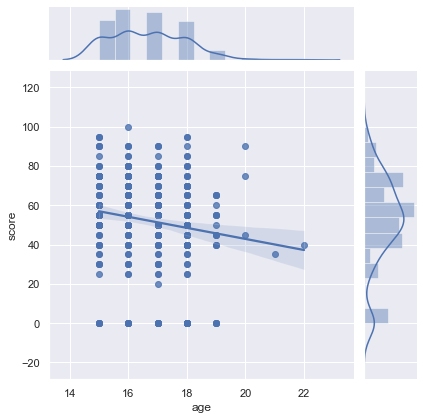

In [131]:
sns.jointplot(x='age', y='score', data=df, kind='reg')

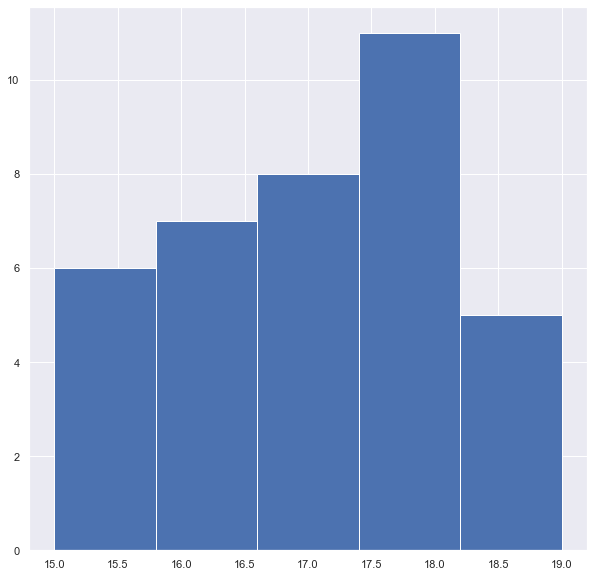

In [132]:
hist(df[df.score == 0].age)

Значения 'age' скоррелированы со значениями 'score'. С увеличением возраста балл экзамена снижается. Вероятно, более взрослые ученики попали на один экзамен с более молодыми из-за состояния здоровья или общей неуспеваемости. Также распределение возраста учеников получивших 0 баллов показывает увеличение доли сильнонеуспевающих (или неявившихся на экзамен?) с ростом возраста.

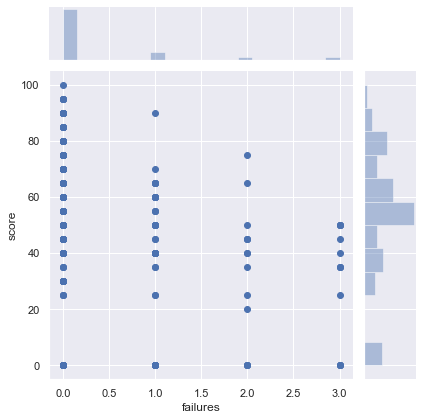

In [133]:
sns.jointplot(x='failures', y='score', data=df)

Значения 'failures' скоррелированы со значениями 'score'. Чем больше неудач, тем меньше балл. Внеучебные провалы деморализуют учеников, либо лишают ресурсов для успешной подготовки.

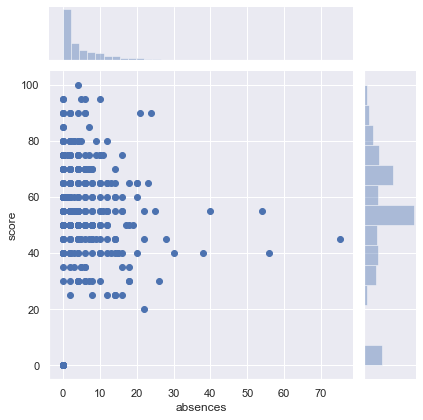

In [134]:
sns.jointplot(x='absences', y='score', data=df)

Значения 'absences' коррелируют с 'score'. Увеличение количества пропущенных занятий снижает вероятность получения высокой оценки.

# Анализ номинативных переменных

In [135]:
sns.set(rc={'figure.figsize': (5, 5)})

In [136]:
def bp(col, order=None):
    # makes seaborn boxplot for column and 'score'
    sns.boxplot(x=col, y='score', data=df, order=order)
    plt.show()

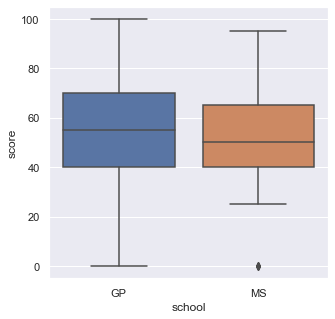

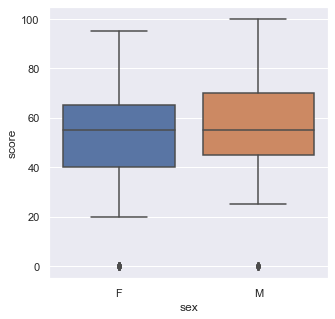

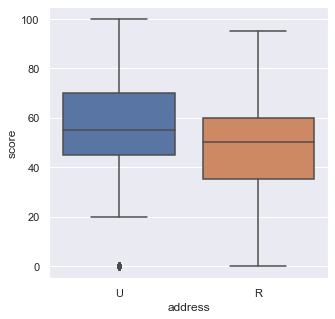

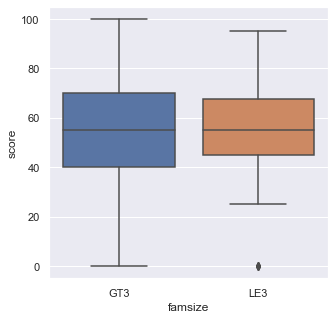

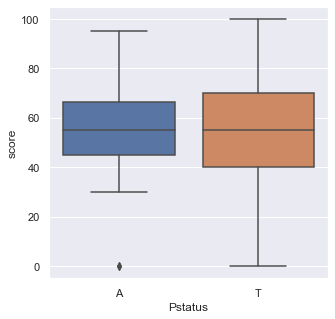

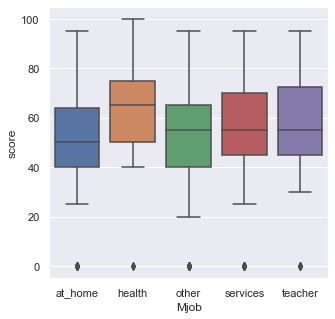

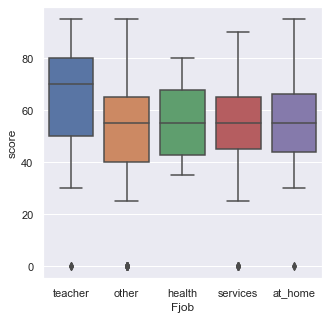

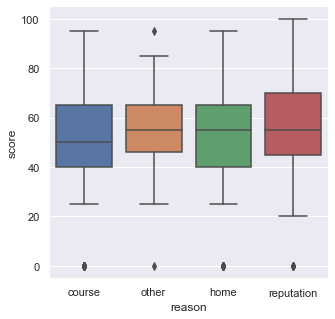

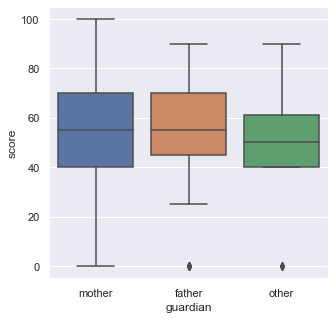

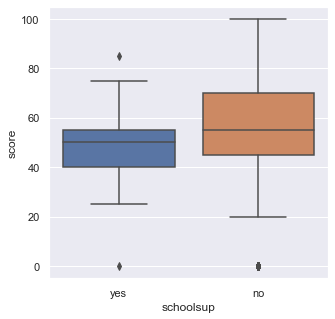

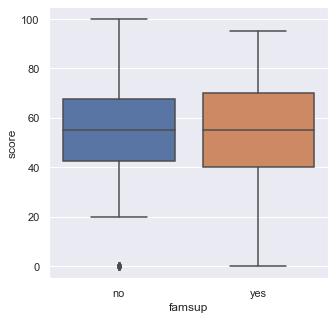

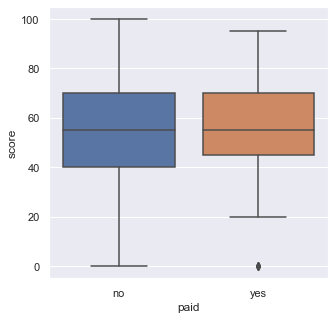

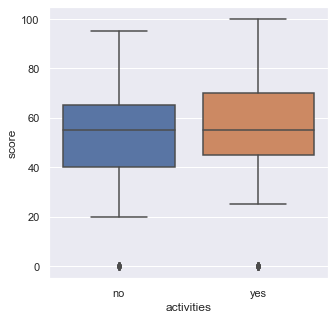

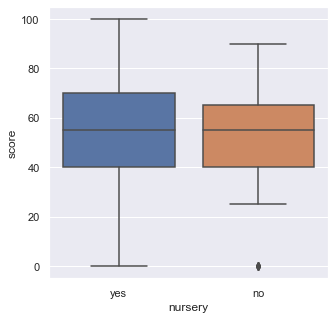

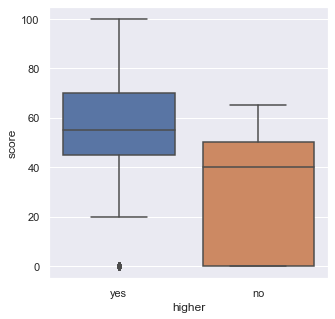

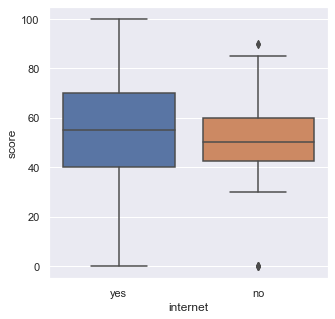

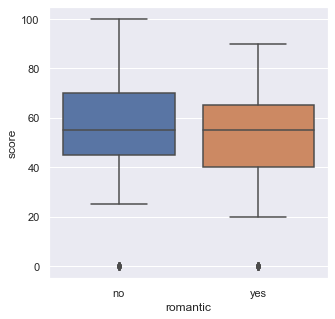

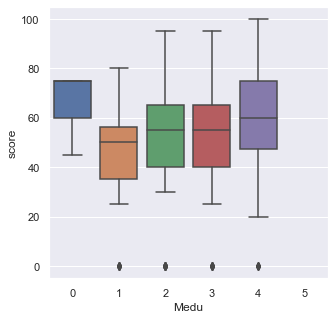

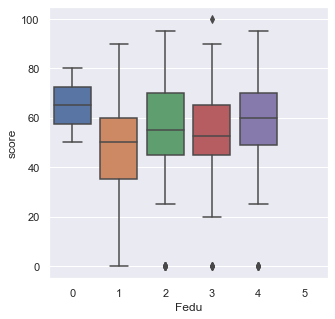

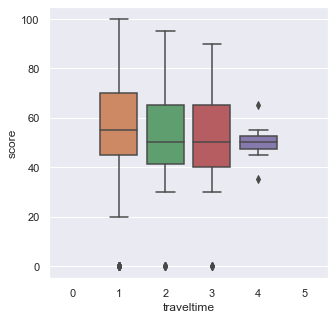

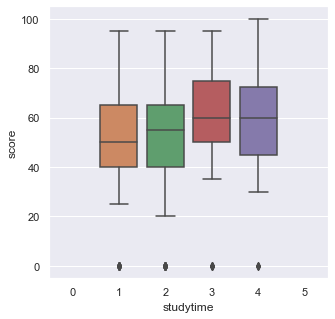

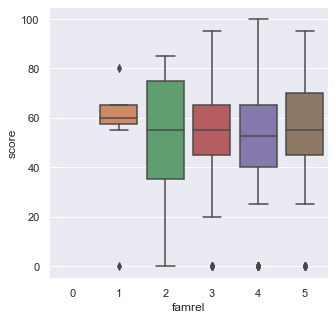

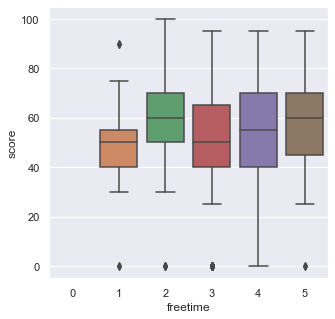

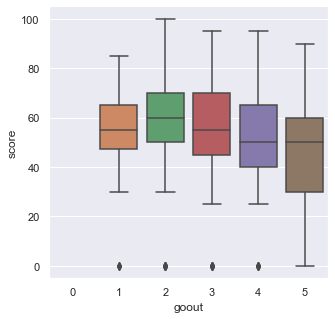

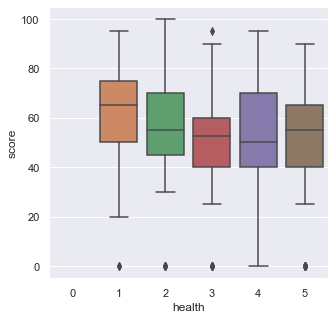

In [137]:
for col in nom_list:
    bp(col)
for col in ran_list:
    bp(col, order=[0, 1, 2, 3, 4, 5])

Практически все номинативные и ранговые значения влияют на оценку экзамена.

In [138]:
from itertools import combinations
from scipy.stats import ttest_ind

model_list = [] # list of important columns


def get_stat_dif(column):
    # Student's test
    cols = df[column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df[column] == comb[0], 'score'],
                     df.loc[df[column] == comb[1], 'score']
                     ).pvalue <= 0.05/len(combinations_all):
            print(column)
            model_list.append(column)
            break
    return model_list

In [139]:
print('По результатам теста Стьюдента для модели отобраны следующие значимые колонки:')
for col in nom_list + ran_list:
    get_stat_dif(col)

По результатам теста Стьюдента для модели отобраны следующие значимые колонки:
address
Mjob
higher
romantic
Medu
goout


In [140]:
model_list

['address', 'Mjob', 'higher', 'romantic', 'Medu', 'goout']

### На результат экзамена влияют данные из колонок: age, failures, absences, address, Mjob, higher, romantic, Medu, goout

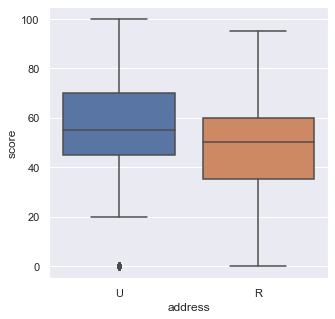

In [141]:
bp('address')

address - более высокий балл получают городские жители

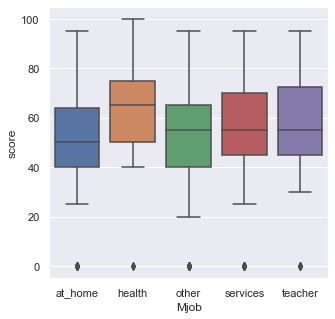

In [142]:
bp('Mjob')

Mjob - более высокий балл получают дети работников медицины и учителей, более низкий балл - дети домохозяек

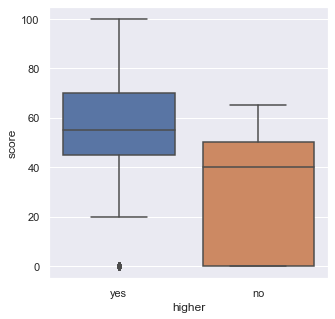

In [143]:
bp('higher')

higher - более высокий балл получают желающие получить высшее образование

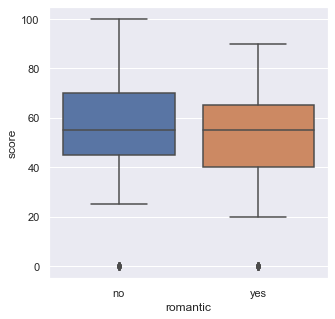

In [144]:
bp('romantic')

romantic - более высокий балл получают не состоящие в романтических отношениях (у них больше времени на учебу)

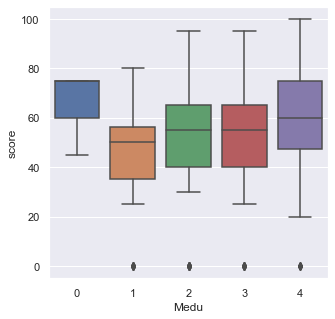

In [145]:
bp('Medu', order=[0, 1, 2, 3, 4])

Medu - более высокий балл получают дети необразованных матерей и дети матерей с высшим образованием, более низкий - дети матерей с начальным образованием

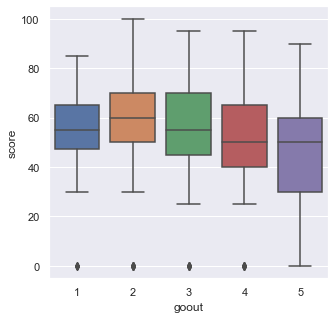

In [146]:
bp('goout', order=[1, 2, 3, 4, 5])

goout - более низкий балл получают ученики, максимально много времени проводящие с друзьями

In [147]:
df_for_model = df.loc[:, ['age', 'failures', 'absences']+model_list+['score']]

In [148]:
df_for_model.sample(10)

,age,failures,absences,address,Mjob,higher,romantic,Medu,goout,score
26,15,0,2,U,other,yes,None,2,2,55.0
144,17,3,0,U,other,yes,no,2,5,0.0
311,19,0,20,U,at_home,no,yes,2,1,65.0
215,17,0,<NA>,U,other,yes,no,3,4,75.0
284,17,0,4,U,other,yes,no,2,5,55.0
390,20,2,<NA>,U,services,yes,no,2,4,45.0
195,17,0,0,U,services,yes,yes,2,2,75.0
134,15,0,0,R,at_home,yes,yes,3,3,0.0
24,15,0,<NA>,R,services,yes,no,2,2,40.0
290,18,0,11,U,teacher,yes,None,4,2,55.0


### df_for_model содержит все значимые данные для построения модели